In [3]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector
from scipy import fftpack
from tabulate import tabulate
%matplotlib inline
mpl.rcParams['figure.dpi'] = 800
#mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 7})
font_size = 10

### Import data
copy the data file from postProcessing/forces/0/coefficient.data to ./data folder

In [39]:
f_name = "/coefficient.dat"
fo_name = "data/"
cases = ['lRef_1','lRef_2','lRef_2_time_2', 'lRef_2_mesh_2', 'Re_250', 'mod_mesh_re']
data = {}
for case in cases:
    data[case] = np.loadtxt(fo_name+case+f_name, unpack=True, usecols=[0, 1, 3])

In [40]:
# figure vars

cd_zero_mean = {}
cl_zero_mean = {}
fft_cd = {}
fft_cl = {}

tml = (np.abs(list(data.values())[0][0] - 5.0)).argmin()
markers = ["o","+","s"]
lines = ['-.',"--","-"]
colors = ['#047495',"teal",'#c04e01'] 

diameter = 0.1
#labels = ["Nx={:d}".format(cells) for cells in [100, 200]]
labels = ["lRef_1","lRef_2","lRef_2_time_2", "lRef_2_mesh_2", "Re_250", "mod_mesh_re"]

213.56429
0.0185593594
(74983,)
0.02387172123444
0.0317035236
0.0170104996
0.014693023999999999


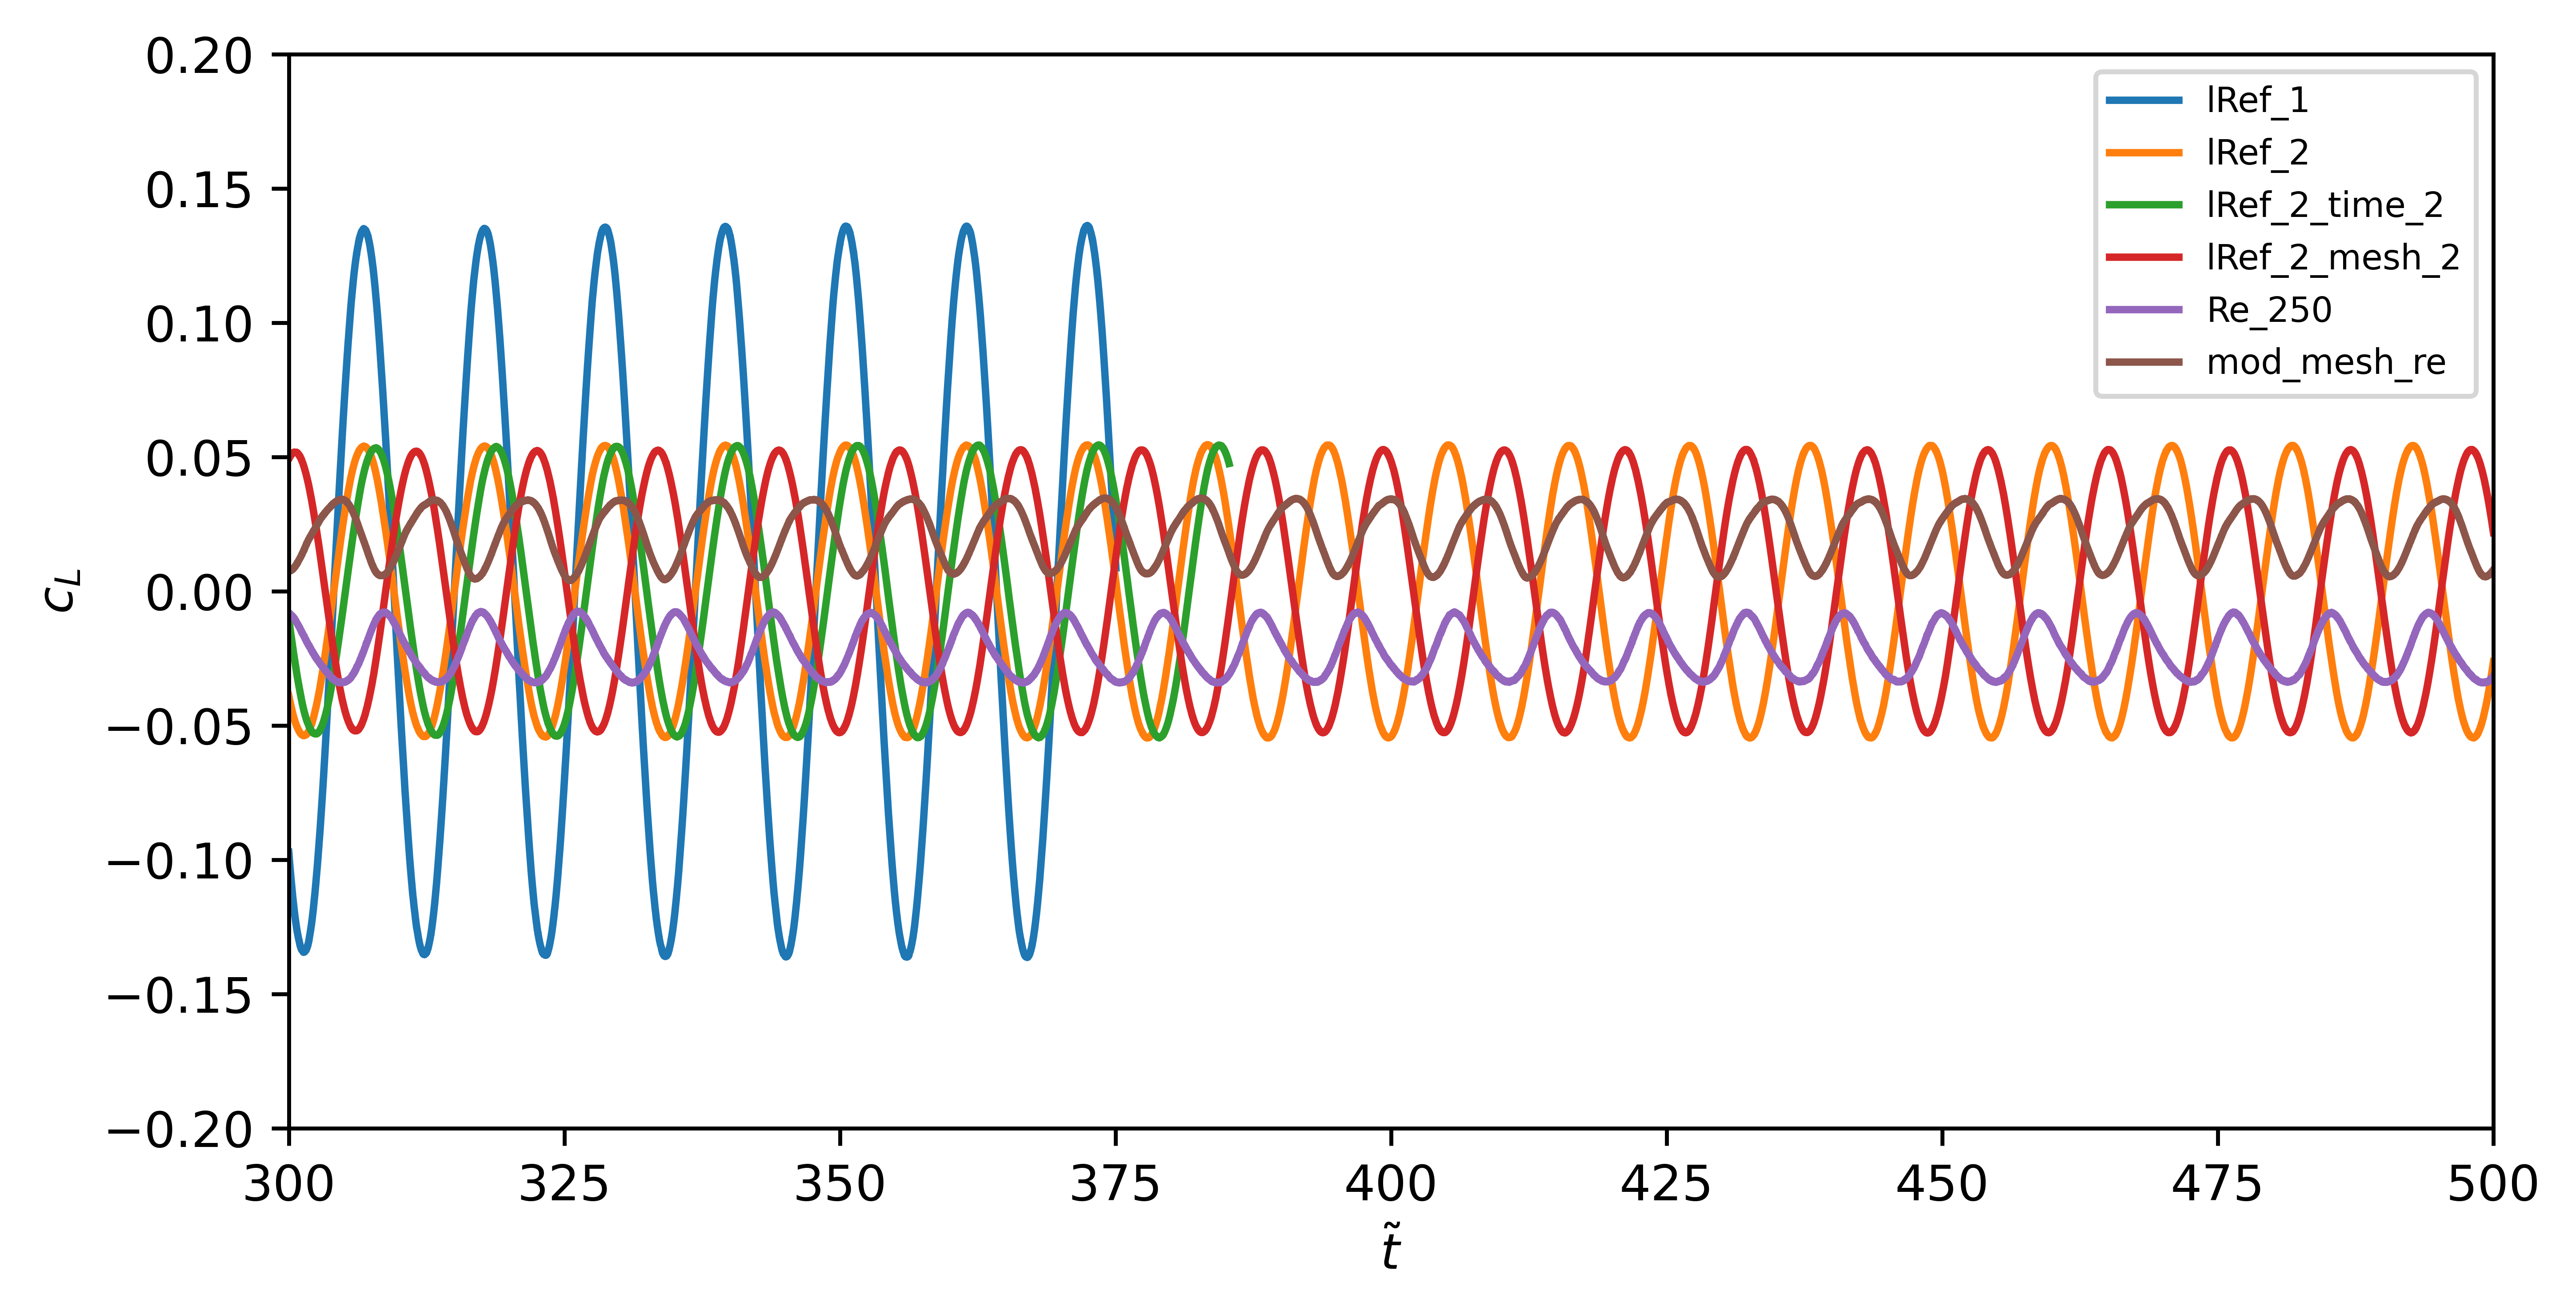

In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))

ax1.set_ylabel(r"$c_L$", fontsize=font_size)
ax1.set_xlabel(r"$\tilde{t}$", fontsize=font_size)
ax1.tick_params(labelsize=font_size)
ax1.set_xlim((300,500))
ax1.set_ylim((-0.2,0.2))

# plotting
for i, case in enumerate(cases):
    #ax1.plot(data[case][0],data[case][2], ls=lines[i], linewidth=1.2, markevery=70, label=labels[i])
    ax1.plot(data[case][0],data[case][2], label=labels[i])
ax1.legend()
fig.savefig('CL.png')

In [56]:
print(data['mod_mesh_re'][0][65000])
print(data['mod_mesh_re'][2][29999])
print(np.shape(data['mod_mesh_re'][2]))
print(np.mean(data['mod_mesh_re'][2][45000:65000]))
print(np.max(data['mod_mesh_re'][2][45000:65000]))
print(np.min(data['mod_mesh_re'][2][45000:65000]))
print(np.max(data['mod_mesh_re'][2][45000:65000])-np.min(data[case][2][45000:65000]))
print(np.max(data['mod_mesh_re'][2][45000:65000])-np.mean(data[case][2][45000:65000]))
print(np.mean(data['mod_mesh_re'][2][45000:65000])-np.min(data[case][2][45000:65000]))

458.74126
0.0185593594
(74983,)
0.021484832385935
0.0346854351
0.00402950366
0.030655931440000003
0.013200602714065
0.017455328725935002
